In [1]:
import pandas as pd
import numpy as np

import sys

assert sys.version_info >= (3, 7)


In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / 'images'/ 'classification'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [35]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\johann\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [36]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X.shape

(70000, 784)

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
y.shape

(70000,)

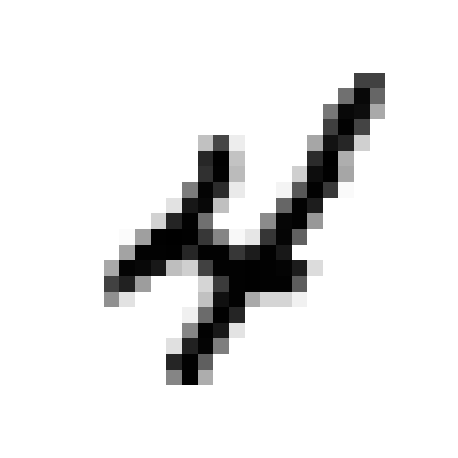

In [12]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
some_digit = X[9]
plot_digit(some_digit)
save_fig('some_digit_plot')
plt.show()

In [13]:
y[9]

'4'

In [40]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [41]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [42]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [15]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

y_test_5

array([ True, False, False, ...,  True, False, False])

In [16]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
some_digit = X[0]

sgd_clf.predict([some_digit])

array([ True])

In [18]:
print(any(sgd_clf.predict(X_train))) #<----what does the any do?

True


In [19]:
%%time

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

CPU times: total: 23.8 s
Wall time: 22 s


array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

print(any(dummy_clf.predict(X_train)))

False


In [21]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [24]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [27]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [28]:
#y_scores = sgd_clf.decision_function([X[0]])
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

<function matplotlib.pyplot.show(close=None, block=None)>

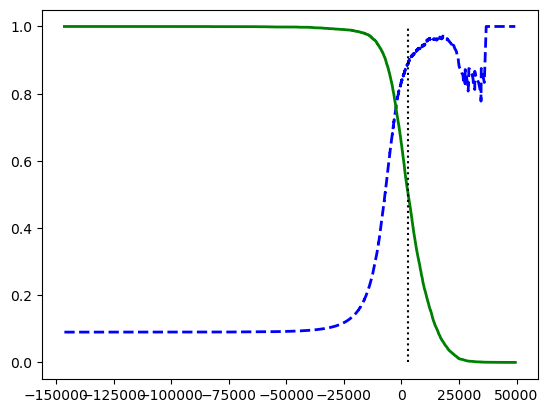

In [33]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='threshold')
plt.show

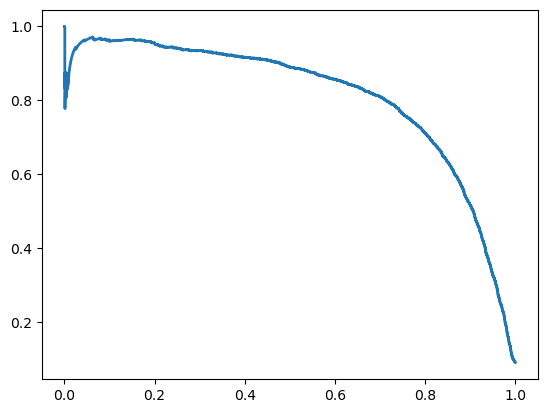

In [34]:
plt.plot(recalls, precisions, linewidth=2, label='Precision/Recall curve')

In [35]:
index_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[index_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [36]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

print(y_scores)
print(y_train_pred_90)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]
[False False False ...  True False False]


In [37]:
thresholds.shape

(60000,)

In [38]:
thresholds


array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [39]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [40]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [41]:
#receiver operating characteristic (ROC) curve = true positive rate vs. false positive rate
#TPR = recall = TP/(TP+FN) FPR = FP/(FP+TN)  TNR = TN/(FP+TN)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

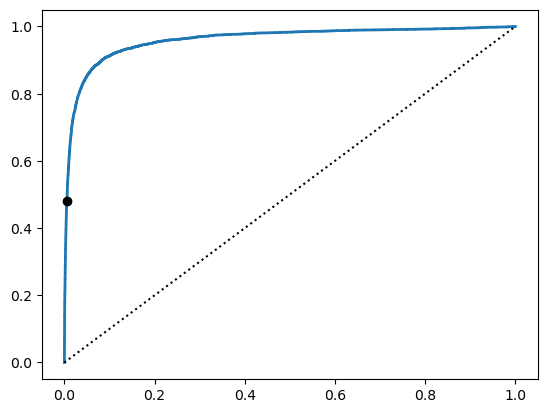

In [42]:
index_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[index_for_threshold_at_90], fpr[index_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label='ROC curve')
plt.plot([0,1], [0,1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], 'ko', label='Thresholds for 90% precision')

plt.show()

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

#use cross_val_predict to predict probablilities for each instance
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [45]:
y_train_5[:5]

array([ True, False, False, False, False])

In [46]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)



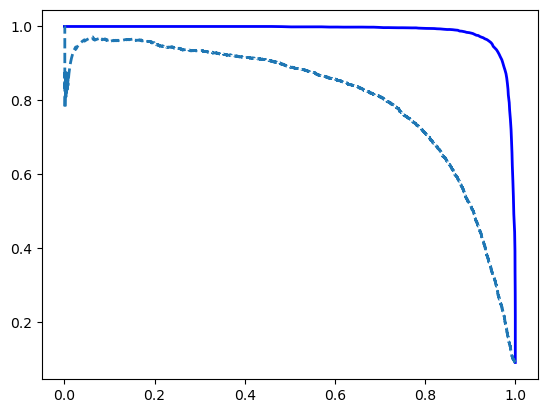

In [47]:
plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2, label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')
plt.show()

In [48]:
y_train_pred_forest = y_probas_forest[:, 1]>=0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [49]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [50]:
##Distinction between binary classifiers and multiclass classification
#  Multiclass classifiers = multinomial classifiers (seems like a bad name, but 
# it might make more sense with experience)

#some classifiers can handle more than one class (example:  RandomForestClassifier)

# Multiclass classification with binary classifiers 
# for digits, 10 different binary classifiers (0 or not 0, 1 or not 1, etc...)
#OvR (one vs. rest) or OvA (one vs. all)
# binary classifiers that compare each combinations fo digits (0 or 1, 0 or 2, 0 or 3, then
# assign digit by majority rule.  I assume you train a 0 or 1 classifier on just 0s and 1s)
#OvO (one vs. one)

# some algorithms such as SVM scale poorly with dataset size
#OvO divides the dataset so this method can be faster for large datasets.

#Scikit-learn detects binary classification for multiclass and runs OvR or OvO depending on the 
#algorithm. 


In [51]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [52]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [53]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [54]:
#So, this works because the index from the some_digit_scores array is the same
#as the label for the digit.

class_id = some_digit_scores.argmax()
class_id

5

In [55]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [56]:
svm_clf.classes_[class_id]

'5'

In [57]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [58]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [59]:
len(ovr_clf.estimators_)

10

In [60]:
ovr_clf.estimators_

[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

In [61]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [62]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [63]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [64]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [65]:
%%time

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

CPU times: total: 12min 9s
Wall time: 12min 13s


array([0.8983, 0.891 , 0.9018])

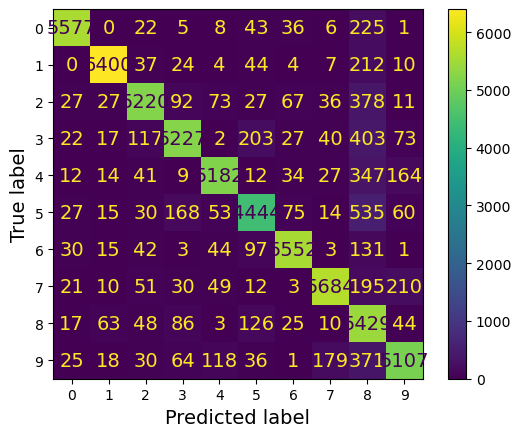

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_predict = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict)
plt.show()

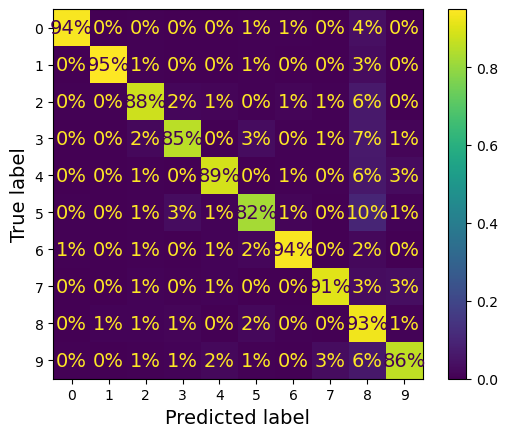

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, normalize='true', values_format='.0%')
plt.show()

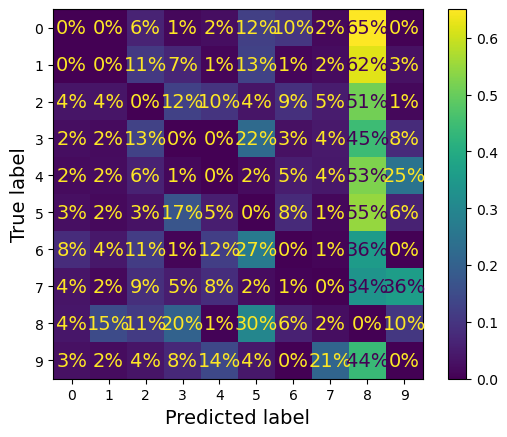

In [68]:
sample_weight = (y_train_predict != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, sample_weight=sample_weight, normalize=
                                       'true', values_format='.0%')
plt.show()

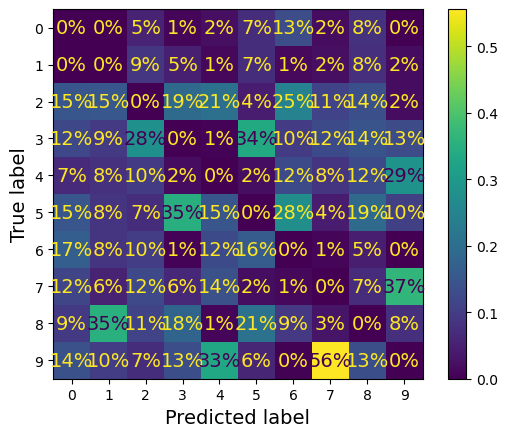

In [69]:
sample_weight = (y_train_predict != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, sample_weight=sample_weight, normalize=
                                       'pred', values_format='.0%')
plt.show()

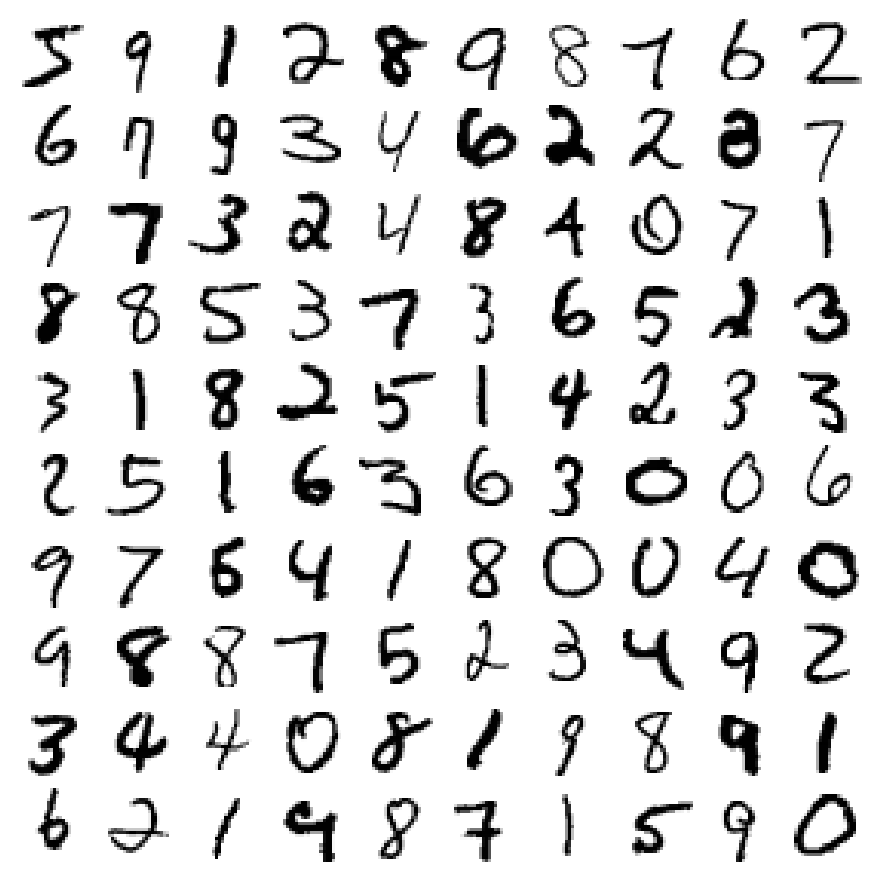

In [70]:
# EXTRA
import matplotlib

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [71]:
"""cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()"""

'cl_a, cl_b = 3, 5\nX_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]\nX_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]\nX_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]\nX_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]\n\nplt.figure(figsize=(8,8))\nplt.subplot(221)\nplot_digits(X_aa[:25], images_per_row=5)\nplt.subplot(222)\nplot_digits(X_ab[:25], images_per_row=5)\nplt.subplot(223)\nplot_digits(X_ba[:25], images_per_row=5)\nplt.subplot(224)\nplot_digits(X_bb[:25], images_per_row=5)\nsave_fig("error_analysis_digits_plot")\nplt.show()'

In [26]:
###Multilabel classification
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = y_train.astype('int8')%2 == 1
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [73]:
knn_clf.predict([some_digit])


array([[False,  True]])

In [74]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')


0.976410265560605

In [75]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='weighted')

0.9778357403921755

In [76]:
###According to the text the classifier is using the dependencies between labels in it
#multilabel classification.  A large number (7, 8, 9) is more than twice as likely to be odd

#if combining models that can only predict one label at a time, they should be chained linearly with
# the predictions from the previous model feeding into the next one.

#and, why am I surprised, there's a class that helps you to chain models together and add the predictions from
#the previous model to the next one

from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])



ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [77]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [17]:
np.random.seed(42)
noise = np.random.randint(0,100, (len(X_train), 784))
noise.shape

(60000, 784)

In [18]:
X_train.shape


(60000, 784)

In [19]:
X_train_mod = X_train + noise

In [24]:
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test



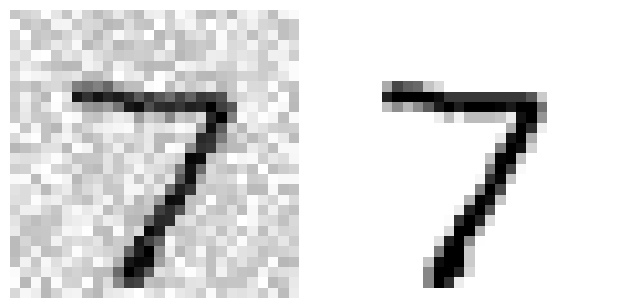

In [25]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

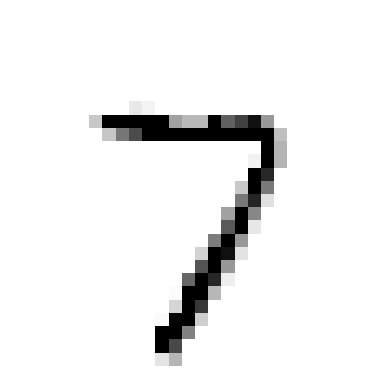

In [27]:
##this makes sense and it matches the book, but I don't understand why I'm 
##looking at a 7 instead of a 5.

##I figured it out.  I had defined y_train and y_test as the same thing way up 
## at the top.  They must have been redefined correctly later in the code.

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

In [34]:
y_test


array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [33]:
y_test[0]

'5'

In [30]:
y_train[0]

'5'

In [31]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)